In [ ]:
import cv2
import pytesseract
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Load and preprocess the text dataset
df = pd.read_excel('DataPi.xlsx', engine='openpyxl')

# Convert the DataFrame to a CSV file with UTF-8 encoding
df.to_csv('DataPi.csv', index=False, encoding='utf-8')



# Load the dataset from the CSV file using Pandas
df = pd.read_csv('DataPi.csv')








In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
# Load the dataset from the CSV file using Pandas
df = pd.read_csv('DataPi.csv')
df['Answer'] = df['Answer'].astype(str)

# Convert the extracted text to a numpy array and transform it using the CountVectorizer object
text_vector = vectorizer.transform(np.array([text]))

# Fit and transform the 'Answer' column of the DataFrame using the CountVectorizer object
X = vectorizer.fit_transform(df['Answer'])

# Compute the cosine similarity between the extracted text and each answer in the dataset
scores = np.array([])
for answer in df['Answer']:
    score = cosine_similarity(text_vector, vectorizer.transform(np.array([answer])))[0]
    scores = np.append(scores, score)
print(text)
print(max(scores))
# Compute the majority vote among the scores
if max(scores) >= 0.7:
    print("The image contains a 'right answer'")
else:
    print("The image does not contain a 'right answer'")

 



60/4 = 15

0.7071067811865475
The image contains a 'right answer'


In [1]:
from google.colab import files
uploaded = files.upload()

Saving answer1.png to answer1.png


In [3]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
from pytesseract import Output

# Load the image
image = cv2.imread('answer1.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



_, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# Find contours in the threshold image
contours, _ = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Check that contours were found
if len(contours) > 0:
    # Find the contour with the largest area, which is likely to be the text region
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw a bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Extract the text from the bounding box using OCR
    text_box = gray_image[y:y+h, x:x+w]
    text = pytesseract.image_to_string(text_box, lang='eng', config='--psm 6 --oem 1 ')

    # Display the image and extracted text
    cv2_imshow(image)
    print('Extracted Text:', text)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('No contours found.')


Extracted Text: 60 = 4 = 15 15 tee-shirts can be made from 60 feet of cotton.



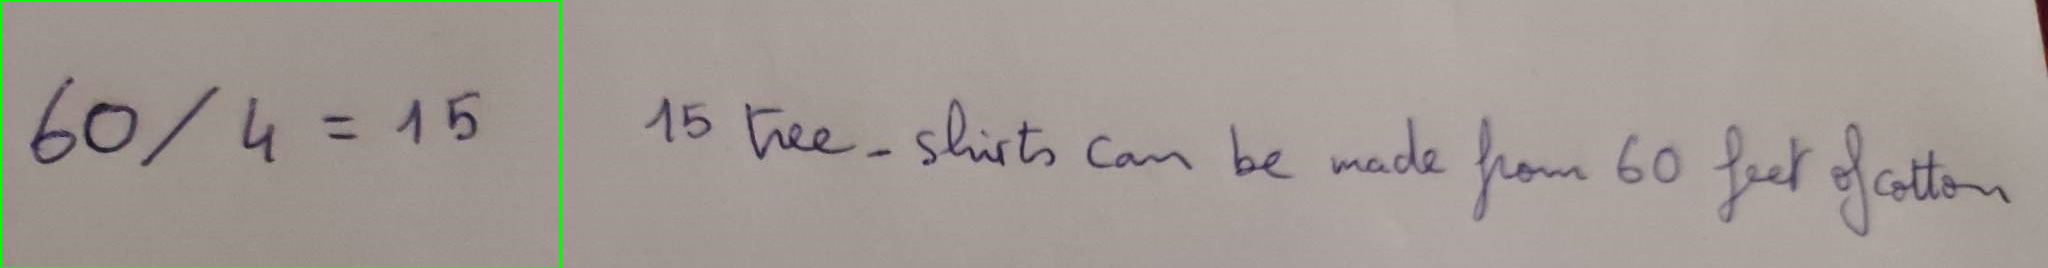

Extracted Text: 60/4 = 15



In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('11 (1).png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to the grayscale image
thresh_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7221, -1.5)

# Remove noise and smooth the image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the threshold image
contours, _ = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Check that contours were found
if len(contours) > 0:
    # Find the contour with the largest area, which is likely to be the text region
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw a bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Extract the text from the bounding box using OCR
    text_box = gray_image[y:y+h, x:x+w]
    text = pytesseract.image_to_string(text_box, lang='eng', config=r'--psm 6 --oem 1 ')

    # Display the image and extracted text
    cv2_imshow(image)
    print('Extracted Text:', text)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('No contours found.')



In [2]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,317 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro